## Московский Авиационный Институт

# Лабораторная работа по предмету Численные методы №4
### "Методы решения начальных и краевых задач для обыкновенных дифференциальных уравнений (ОДУ) и систем ОДУ"
**Преподаватель**: Филиппов Глеб Сергеевич \
**Судент**: Титеев Рамиль \
**Группа**: М8О-305Б-21\
Вариант 26

Импортируем библиотеки, для дальнейшей работы с ними

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable 

plt.style.use('ggplot')


## Задание 4.1
Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки . С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением.

Задана задача Коши: 
$$\begin{cases}
\begin{aligned}
x^4y'' + 2x^3y' + y = 0,\\
y(1) = 1, \\
y'(1) = 1,\\
x \in (1;2) 
\end{aligned}
\end{cases}
$$

$h=0.1$

Задано точное решение: 
$$y = (sin(1) + cos(1))cos(\frac{1}{x}) + (sin(1) - cos(1))sin(\frac{1}{x})$$

1. Реализуем метод Эйлера

In [2]:
def euler_method_system(f: Callable[[float,float,float], tuple[float, float]], 
                        y0: float, 
                        z0: float, 
                        t0: float, 
                        tn: float, 
                        h: float
) -> tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]:
    """
    Метод Эйлера для решения ОДУ

    Args:
        f (Callable[[float,float,float], tuple[float, float]]): Функция 
        представляющая из себя правую часть ОДУ
        y0 (float): Условия коши в t0 первого порядка
        z0 (float): Условия коши d t0 второго порядка
        t0 (float): Левая граница решения
        tn (float): Правая граница решения
        h (float): Шаг

    Returns:
        tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]: Найденные значения
    """
    
    t_values = np.arange(t0, tn+h, h)
    y_values = [y0]
    z_values = [z0]
    for t in t_values[1:]:
        y_new = y_values[-1] + h * z_values[-1]
        z_new = z_values[-1] + h * f(t-h, y_values[-1], z_values[-1])[1]
        y_values.append(y_new)
        z_values.append(z_new)
    return t_values, np.array(y_values), np.array(z_values)

2. Реализуем метод Рунге-Кутты

In [3]:
def runge_kutta_method_system(f: Callable[[float,float,float], tuple[float, float]], 
                              y0: float, 
                              z0: float, 
                              t0: float, 
                              tn: float, 
                              h: float
) -> tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]:
    """
    Метод Рунге-Кутты для решения ОДУ

    Args:
        f (Callable[[float,float,float], tuple[float, float]]): Функция 
        представляющая из себя правую часть ОДУ
        y0 (float): Условия коши в t0 первого порядка
        z0 (float): Условия коши d t0 второго порядка
        t0 (float): Левая граница решения
        tn (float): Правая граница решения
        h (float): Шаг

    Returns:
        tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]: Найденные значения
    """
    t_values = np.arange(t0, tn+h, h)
    y_values = [y0]
    z_values = [z0]
    for t in t_values[1:]:
        k1y = h * z_values[-1]
        k1z = h * f(t-h, y_values[-1], z_values[-1])[1]
        k2y = h * (z_values[-1] + k1z / 2)
        k2z = h * f(t-h+h/2, y_values[-1]+k1y/2, z_values[-1]+k1z/2)[1]
        k3y = h * (z_values[-1] + k2z / 2)
        k3z = h * f(t-h+h/2, y_values[-1]+k2y/2, z_values[-1]+k2z/2)[1]
        k4y = h * (z_values[-1] + k3z)
        k4z = h * f(t, y_values[-1]+k3y, z_values[-1]+k3z)[1]
        y_new = y_values[-1] + (k1y + 2*k2y + 2*k3y + k4y) / 6
        z_new = z_values[-1] + (k1z + 2*k2z + 2*k3z + k4z) / 6
        y_values.append(y_new)
        z_values.append(z_new)
    return t_values, np.array(y_values), np.array(z_values)

3. Реализуем метод Адамса

In [4]:
def adams_method_system(f: Callable[[float,float,float], tuple[float, float]], 
                        y0: float, 
                        z0: float, 
                        t0: float, 
                        tn: float, 
                        h: float
) -> tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]:
    """
    Метод Адамса для решения ОДУ

    Args:
        f (Callable[[float,float,float], tuple[float, float]]): Функция 
        представляющая из себя правую часть ОДУ
        y0 (float): Условия коши в t0 первого порядка
        z0 (float): Условия коши d t0 второго порядка
        t0 (float): Левая граница решения
        tn (float): Правая граница решения
        h (float): Шаг

    Returns:
        tuple[np.ndarray[float], np.ndarray[float], np.ndarray[float]]: Найденные значения
    """
    num_steps = int((tn - t0) / h) + 1
    t_values = np.linspace(t0, tn, num_steps)
    y_values = np.zeros(num_steps)
    z_values = np.zeros(num_steps)
    y_values[0] = y0
    z_values[0] = z0

    _, y_rk, z_rk = runge_kutta_method_system(f, y0, z0, t0, t0 + 2*h, h)
    y_values[:4] = y_rk
    z_values[:4] = z_rk

    for i in range(4, num_steps):
        y_values[i] = y_values[i-1] + h/24 * (55*z_values[i-1] - 59*z_values[i-2] + 
                                              37*z_values[i-3] - 9*z_values[i-4])
        
        z_values[i] = z_values[i-1] + h/24 * (55*f(t_values[i-1], y_values[i-1], z_values[i-1])[1] -
                                              59*f(t_values[i-2], y_values[i-2], z_values[i-2])[1] +
                                              37*f(t_values[i-3], y_values[i-3], z_values[i-3])[1] -
                                              9*f(t_values[i-4], y_values[i-4], z_values[i-4])[1])

    return t_values, y_values, z_values

4. Реализуем метод Рунге-Румберга

In [5]:
def runge_romberg_error(h1, y1, h2, y2, p):
    return np.abs((y1 - y2) / ((h2 / h1)**p - 1))

5. Проведем расчеты для варианта

In [6]:
x0 = 1
xn = 2
h = 0.1
y0 = 1
z0 = 1

def y_etalon(t):
    return (np.sin(1)+np.cos(1))*np.cos(1/t) + (np.sin(1)-np.cos(1))*np.sin(1/t) 


def f(x, y, z):
    dy = z
    dz = (-2*(x**3)*z - y)/(x**4)
    return dy, dz

In [7]:
t_eul = euler_method_system(f, y0, z0, x0, xn, h)
t_run  = runge_kutta_method_system(f, y0, z0, x0, xn, h)
t_adam = adams_method_system(f, y0, z0, x0, xn, h)

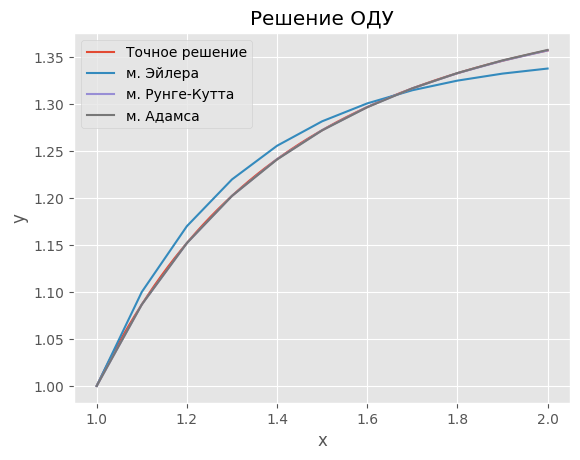

In [8]:
t_etalon = np.linspace(x0, xn, 1000)

plt.title("Решение ОДУ")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.plot(t_etalon, y_etalon(t_etalon), label="Точное решение")
plt.plot(t_eul[0], t_eul[1], label="м. Эйлера")
plt.plot(t_run[0], t_run[1], label="м. Рунге-Кутта")
plt.plot(t_adam[0], t_adam[1], label="м. Адамса")
plt.legend()
plt.show()

In [9]:
for method, name in [(euler_method_system, "Эйлера"), 
                     (runge_kutta_method_system, "Рунге-Кутта"), 
                     (adams_method_system, "Адамса")]:
    h2 = h/2
    _, yh1, _ = method(f, y0, z0, x0, xn, h)
    _, yh2, _ = method(f, y0, z0, x0, xn, h2)
    print(f"------------ Метод {name} ------------")
    print(f"Значение в h1: {yh1[-1]} и в h2: {yh2[-1]}")
    print(f"Погрешность вычисленная методом Рунге-Ромберга: \
{runge_romberg_error(h, yh1[-1], h2, yh2[-1], p=2 if 'Эйлера' in name else 4)}")
    print(f"Погрешность с точным значением: {np.abs(yh2[-1] - y_etalon(xn))}\n")

------------ Метод Эйлера ------------
Значение в h1: 1.3377547335624311 и в h2: 1.3476409534376899
Погрешность вычисленная методом Рунге-Ромберга: 0.01318162650034497
Погрешность с точным значением: 0.009367147056885905

------------ Метод Рунге-Кутта ------------
Значение в h1: 1.3570048686194527 и в h2: 1.357007915852238
Погрешность вычисленная методом Рунге-Ромберга: 3.25038163756138e-06
Погрешность с точным значением: 1.8464233786374962e-07

------------ Метод Адамса ------------
Значение в h1: 1.357577858093548 и в h2: 1.3570796637483675
Погрешность вычисленная методом Рунге-Ромберга: 0.0005314073015258695
Погрешность с точным значением: 7.15632537917621e-05



### Вывод 4.1
Были реализованы методы Эйлера, Рунге-Кутта и Адама 4го порядка. Решено ОДУ и отображено на графике в различных методах. Произведена оценка погрешности методом Рунге-Ромберга и с точным значением из условия. Самым точным оказался метод Рунге-Кутта.

## Задание 4.2
Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением.

Задана система уравнений: 
$$\begin{cases}
\begin{aligned}
x(x+1)y'' + (x+2)y' - y &= x+\frac{1}{x},\\
y'(1) &= \frac{3}{2},\\
4y'(2) + y(2) &= 13+4\ln{2}.
\end{aligned}
\end{cases}$$

Задано точное решение: 
$$y(x) = x + \frac{7}{2} + \frac{1}{x} + (\frac{x}{2}+1)\cdot \ln{|x|}$$

1. Реализуем метод стрельбы

In [10]:
def shooting_method(F: Callable[[float,float,float], tuple[float, float]], 
                    a: float, 
                    b: float, 
                    h: float, 
                    y0: float,
                    y1: float,
                    e=1e-10
) -> np.ndarray[float]:
    """
    ## Метод стрельбы для решения краевой задачи

    ### Args:
        F (function): Исходное уравнение
        a (float): Левая граница решения
        b (float): Правая граница решения
        h (float): Шаг
        y0 (float): Условие в левой границе
        y1 (float): Условие в правой границе
        e (_type_, optional): Точность сходимости. Defaults to 1e-10.

    ### Returns:
        np.ndarray[float]: Найденые значения
    """

    nu1 = 1.0
    nu2 = 0.8
    f1 = runge_kutta_method_system(F, y0, nu1, a, b, h)[1][-1] - y1
    f2 = runge_kutta_method_system(F, y0, nu2, a, b, h)[1][-1] - y1

    while(abs(f2) > e):
        nu1, nu2 = nu2, nu2 - f2 * (nu2 - nu1) / (f2 - f1)
        f1, f2 = f2, runge_kutta_method_system(F, y0, nu2, a, b, h)[1][-1] - y1
    return runge_kutta_method_system(F, y0, nu2, a, b, h)[1]

2. Метод конченых разностей

In [11]:
def finite_difference_method(p: Callable[[float], float],
                             q: Callable[[float], float],
                             a: float, 
                             b: float, 
                             h: float, 
                             y0: float,
                             y1: float
) -> np.ndarray[float]:
    """
    ## Конечно-разностный метод решения краевой задачи

    ### Args:
        p (Callable[[float], float]): коэффициен p выраженный через x
        q (Callable[[float], float]): коэффициен q выраженный через x
        a (float): Левая граница решения
        b (float): Правая граница решения
        h (float): Шаг
        y0 (float): Условие в левой границе
        y1 (float): Условие в правой границе

    ### Returns:
        np.ndarray[float]: Найденые значения
    """

    x = np.arange(a, b + h, h)
    N = int((b - a) / h)
    A = []
    B = []
    C = []
    D = []
    A.append(0)
    B.append(-2 + h * h * q(x[1]))
    C.append(1 + p(x[1]) * h / 2)
    D.append(-(1 - (p(x[1]) * h) / 2) * y0)
    for i in range(2, N):
        A.append(1 - p(x[i]) * h / 2)
        B.append(-2 + h * h * q(x[i]))
        C.append(1 + p(x[i]) * h / 2)
        D.append(0)
    A.append(1 - p(x[N - 2]) * h / 2)
    B.append(-2 + h * h * q(x[N - 2]))
    C.append(0)
    D.append(-(1 + (p(x[N - 2]) * h) / 2) * y1)

    P = np.zeros(N)
    Q = np.zeros(N)
    P[0] = (-C[0] / B[0])
    Q[0] = (D[0] / B[0])
    for i in range(1, N):
        P[i] = (-C[i] / (B[i] + A[i] * P[i - 1]))
        Q[i] = ((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))
    ans = np.zeros(N)
    ans[N - 1] = Q[N - 1]
    for i in range(N - 2, 0, -1):
        ans[i] = P[i] * ans[i + 1] + Q[i]
    ans[0] = y0
    ans = np.append(ans, y1)
    return ans

Так же реализуем метод Рунге-Ромберга

In [12]:
def Runge_Romberg_method(h1, y1, h2, y2, p):
    res = np.zeros(len(y1))
    for i in range(len(y1)):
        res[i] = (y1[i]-y2[i*2]) / ((h2/h1)**p -1 )
    return res

3. Реализуем функции, заданные вариантом

In [13]:
def ode_system(x, y, z):
    dydx = z
    dzdx = (x + 1/x + y - (x+2)*z)/(x*(x+1))
    return dydx, dzdx

def accurate_function(x):
    return x + 7/2 + 1/x + (x/2 + 1)*(np.log2(np.abs(x)))

def p(x):
    return (x+2)/(x*(x+1))

def q(x):
    return (-1)/(x*(x+1))

4. Сделаем расчеты для варианта

In [14]:
a = 1
b = 2
h = 0.1
e = 0.001
y0 = accurate_function(a)
y1 = accurate_function(b)

In [15]:
shooting_sol_h1 = shooting_method(ode_system, a, b, h, y0, y1)
finite_difference_sol_h1 = finite_difference_method(p, q, a, b, h, y0, y1)

shooting_sol_h2 = shooting_method(ode_system, a, b, h/2, y0, y1)
finite_difference_sol_h2 = finite_difference_method(p, q, a, b, h/2, y0, y1)

In [16]:
x = np.arange(a, b + h, h)
y = accurate_function(x)

print("                       X: ", *np.around(x, 3))
print("       Точное значение Y: ", *np.around(y, 3))
print("          Метод стрельбы: ", *np.around(shooting_sol_h1, 3))
print("Конечно-разностный метод: ", 
      *np.around(finite_difference_sol_h1, 3), "\n")

print("---------- Погрешность м. Рунге-Ромберга  ----------")
print("          Метод стрельбы: ", 
      *Runge_Romberg_method(h, shooting_sol_h1, h/2, shooting_sol_h2, 4))
print("Конечно-разностный метод: ", 
      *Runge_Romberg_method(h, finite_difference_sol_h1, 
                            h/2, finite_difference_sol_h2, 4), "\n")

print("---------- Погрешность от точного значения ----------")
print("          Метод стрельбы: ", 
      *np.around(np.abs(shooting_sol_h1 - y), 3))
print("Конечно-разностный метод: ", 
      *np.around(np.abs(finite_difference_sol_h1 - y), 3))


                       X:  1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0
       Точное значение Y:  5.5 5.722 5.954 6.194 6.44 6.69 6.946 7.204 7.467 7.732 8.0
          Метод стрельбы:  5.5 5.748 5.997 6.246 6.495 6.744 6.994 7.245 7.496 7.748 8.0
Конечно-разностный метод:  5.5 5.993 6.229 6.46 6.688 6.912 7.133 7.352 7.569 7.785 8.0 

---------- Погрешность м. Рунге-Ромберга  ----------
          Метод стрельбы:  -0.0 -4.9987826855613095e-08 -6.047658492510284e-08 -5.6436569669434295e-08 -4.7618575157078645e-08 -3.783144298571036e-08 -2.8491423146685218e-08 -2.004224673631446e-08 -1.2540729699139775e-08 -5.901747120636476e-09 -2.2737367544323207e-14
Конечно-разностный метод:  -0.0 -0.1043161561023112 -0.08746629745074017 -0.07265692065411997 -0.05942847064623891 -0.04744874113183168 -0.03647186437681474 -0.026312122027265634 -0.016826704133114843 -0.007904053351317468 -0.0 

---------- Погрешность от точного значения ----------
          Метод стрельбы:  0.0 0.026 0.043 0.052 0.055 0.0

5. Построим графики

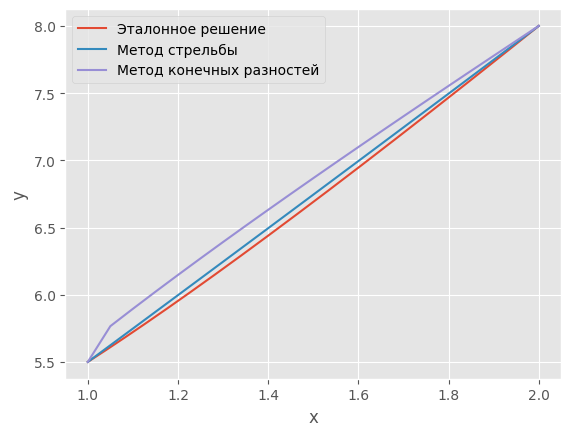

In [17]:
t = np.linspace(1, 2, 1000)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t, accurate_function(t), label="Эталонное решение")
plt.plot(np.linspace(1, 2, len(shooting_sol_h2)), 
         shooting_sol_h2, label="Метод стрельбы")
plt.plot(np.linspace(1, 2, len(finite_difference_sol_h2)), 
         finite_difference_sol_h2, label="Метод конечных разностей")
plt.legend()
plt.show()

### Вывод 4.2
Реализованы методы стрельбы и конечно-разностный метод для решения краевой задачи.